# Laptop Analysis
## Name:Saraansh Chikara

In [1]:
#importing python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read csv file
df=pd.read_csv("Laptop.csv")

In [3]:
#showing the dataset
df.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [4]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          130 non-null    int64  
 1   Brand               130 non-null    object 
 2   Model               116 non-null    object 
 3   Series              80 non-null     object 
 4   Processor           123 non-null    object 
 5   Processor_Gen       123 non-null    object 
 6   RAM                 122 non-null    float64
 7   Hard_Disk_Capacity  122 non-null    object 
 8   OS                  122 non-null    object 
 9   Rating              130 non-null    float64
 10  Price               130 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 11.3+ KB


In [5]:
#checking wthere any null values
df.isnull().sum()

Unnamed: 0             0
Brand                  0
Model                 14
Series                50
Processor              7
Processor_Gen          7
RAM                    8
Hard_Disk_Capacity     8
OS                     8
Rating                 0
Price                  0
dtype: int64

In [6]:
#checking whether any duplicated values
df.duplicated().sum()

0

In [7]:
#dropping null values
df=df.dropna()

In [8]:
#checking statistical values
df[['RAM','Rating','Price']].describe()

,RAM,Rating,Price
count,72.000000,72.000000,72.000000
mean,8.833333,4.291667,52474.763889
std,3.484372,0.285692,17882.937326
min,4.000000,2.900000,17640.000000
25%,8.000000,4.200000,39690.000000
50%,8.000000,4.300000,49940.000000
75%,8.000000,4.500000,60071.750000
max,16.000000,4.800000,114940.000000


In [9]:
#rechecking whether null values have been dropped
df.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 0
Series                0
Processor             0
Processor_Gen         0
RAM                   0
Hard_Disk_Capacity    0
OS                    0
Rating                0
Price                 0
dtype: int64

In [10]:
df.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940
5,5,ASUS,Ryzen,3,3250U,3rd,8.0,256 GB SSD,Windows 10 Home,4.3,35940
6,6,DELL,Inspiron,Athlon,3050U,-,4.0,256 GB SSD,Windows 11 Home,4.2,33940
8,8,Lenovo,IdeaPad,3,i3,10th,8.0,1 TB HDD,Windows 10 Home,4.1,37440


In [11]:
#statistical values
df.describe(include='object').T

,count,unique,top,freq
Brand,72,8,ASUS,27
Model,72,25,IdeaPad,15
Series,72,26,3,17
Processor,72,16,i3,23
Processor_Gen,72,9,11th,31
Hard_Disk_Capacity,72,7,512 GB SSD,34
OS,72,7,Windows 10 Home,36


In [12]:
#checking no. of rows and columns
x=df.shape
print(f"The Dataframe:Laptops has {x[0]} rows and {x[1]} columns")

The Dataframe:Laptops has 72 rows and 11 columns


In [13]:
#defing a label for containers
def showlabels(ax):
    for data in ax.containers:ax.bar_label(data)

### Data Visualisation
## Brand Analysis

In [14]:
df.Brand.value_counts()

Brand
ASUS         27
Lenovo       24
HP            9
DELL          5
acer          3
MSI           2
realme        1
MICROSOFT     1
Name: count, dtype: int64

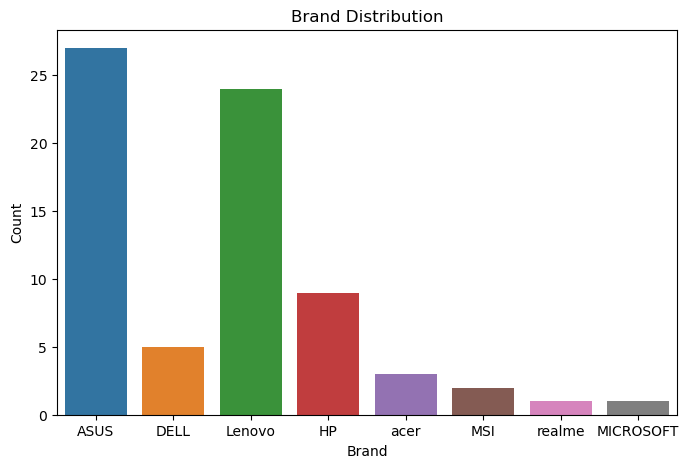

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Brand', data=df)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')
plt.show()

#### Conclusion: Asus had the most laptops with 27


In [16]:
price_of_brands=df.groupby(['Brand'])['Price'].sum()
new_price=price_of_brands.sort_values(ascending=False).reset_index()
print(new_price)

       Brand    Price
0       ASUS  1369340
1     Lenovo  1188894
2         HP   537460
3       DELL   214900
4       acer   185820
5        MSI   142880
6  MICROSOFT    91949
7     realme    46940


Text(0, 0.5, 'Price')

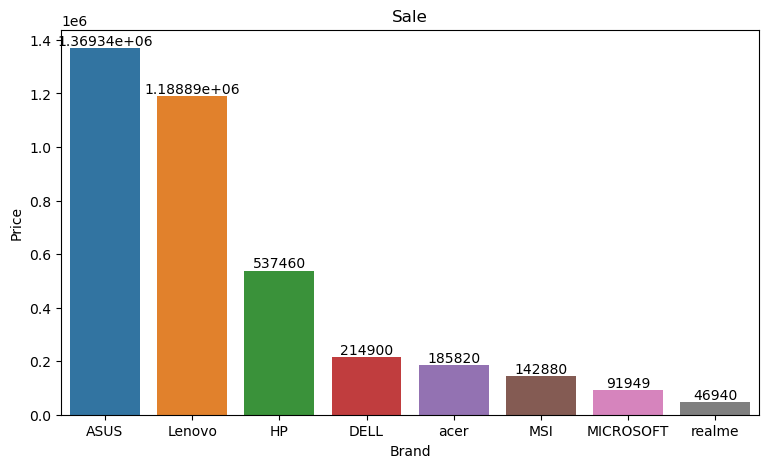

In [17]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x="Brand",y="Price", data =new_price)
showlabels(ax)
plt.title("Sale")
plt.xlabel("Brand")
plt.ylabel("Price")

In [18]:
f=df.groupby(['Brand'])['Model'].value_counts()
g=f.sort_values(ascending=False).head(10).reset_index()
print(g)

    Brand       Model  count
0  Lenovo     IdeaPad     15
1    ASUS    VivoBook     11
2    ASUS    Vivobook      6
3  Lenovo     Ideapad      6
4    DELL    Inspiron      4
5      HP    Pavilion      3
6      HP       Ryzen      3
7    ASUS         TUF      2
8    ASUS       Ryzen      2
9    ASUS  Chromebook      2


In [19]:
count_of_processor=df.groupby(['Brand'])['Processor'].value_counts()
print(count_of_processor)

Brand      Processor
ASUS       i3           10
           i5            8
           -             4
           i7            2
           3250U         1
           5500U         1
           4800HS        1
DELL       3450U         3
           3250U         1
           3050U         1
HP         i7            1
           5600H         1
           i5            1
           i3            1
           5300U         1
           4800H         1
           4600H         1
           3250U         1
           -             1
Lenovo     i3           11
           i5            8
           A9            1
           5600H         1
           5600U         1
           AMD           1
           5500U         1
MICROSOFT  i5            1
MSI        i5            2
acer       i5            2
           5600H         1
realme     i3            1
Name: count, dtype: int64


In [20]:
h=count_of_processor.idxmax()
print("Most Common laptop and processor is :",{h})

Most Common laptop and processor is : {('Lenovo', 'i3')}


In [21]:
i=df.groupby(['Brand'])["Hard_Disk_Capacity"].value_counts()
d=i.sort_values(ascending=False).reset_index()
print(d)

        Brand  Hard_Disk_Capacity  count
0      Lenovo          512 GB SSD     13
1        ASUS          512 GB SSD     11
2      Lenovo          256 GB SSD      8
3        ASUS          256 GB SSD      7
4        ASUS            1 TB HDD      6
5          HP          512 GB SSD      6
6      Lenovo            1 TB HDD      3
7        DELL          256 GB SSD      3
8        acer            1 TB HDD      2
9         MSI          512 GB SSD      2
10         HP            1 TB HDD      2
11         HP          256 GB SSD      1
12       DELL            1 TB HDD      1
13       DELL          512 GB SSD      1
14       ASUS  32 GB EMMC Storage      1
15  MICROSOFT          128 GB SSD      1
16       ASUS  64 GB EMMC Storage      1
17       ASUS            1 TB SSD      1
18       acer          512 GB SSD      1
19     realme          256 GB SSD      1


In [23]:
Brand_rating=df.groupby(["Brand"])["Rating"].value_counts()
bar1=Brand_rating.sort_values(ascending=False).reset_index()
print(bar1)

        Brand  Rating  count
0        ASUS     4.3      7
1      Lenovo     4.3      7
2      Lenovo     4.4      6
3        ASUS     4.2      5
4      Lenovo     4.2      4
5        ASUS     4.5      4
6          HP     4.5      3
7        ASUS     4.6      3
8        DELL     4.3      2
9      Lenovo     4.1      2
10       ASUS     3.7      2
11         HP     4.4      2
12       DELL     4.2      2
13     Lenovo     4.5      2
14     Lenovo     3.7      1
15       acer     4.5      1
16     Lenovo     3.9      1
17  MICROSOFT     4.5      1
18     Lenovo     4.6      1
19        MSI     4.4      1
20        MSI     4.5      1
21       acer     4.4      1
22       acer     4.6      1
23         HP     4.3      1
24         HP     3.9      1
25         HP     4.2      1
26         HP     4.6      1
27       DELL     3.9      1
28       ASUS     4.1      1
29       ASUS     4.4      1
30       ASUS     4.7      1
31       ASUS     4.8      1
32       ASUS     3.6      1
33       ASUS 

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x="Brand",y="Rating", data=bar1)
plt.title("Highest Rating Brand")
plt.xlabel("Brand")
plt.ylabel("Rating")
showlabels(ax)

## Model Analysis

In [ ]:
Model_count=df["Model"].value_counts()
Model_count1=Model_count.sort_values(ascending= False).head(5).reset_index()
print(Model_count1)

In [ ]:
x=df.groupby(['Model'])['Price'].sum()
y=x.sort_values(ascending=False).head(5).reset_index()
print(y)

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Model',y="Price", data=y)
showlabels(ax)

#### Conclusion: Ideapad type model was the highest in inventory

In [ ]:
Model_rating=df.groupby(["Model"])["Rating"].value_counts()
bar=Model_rating.sort_values(ascending=False).reset_index().head()
print(bar)

In [ ]:
ax=sns.barplot(x="Model",y="Rating", data=bar)
plt.title("Highest Rating Model")
plt.xlabel("Model")
plt.ylabel("Rating")
showlabels(ax)

## 3)Processor Analysis

In [ ]:
df.Processor.value_counts()

In [ ]:
highest_selling_processor=count_of_processor.idxmax()
print("Most sold  :",{highest_selling_processor})

### Conclusion: Lenovo had the most  i3 processor

In [ ]:
high_rating=df.groupby(['Brand','Processor'])['Rating'].value_counts()
order=high_rating.sort_values(ascending=True).head(10).reset_index()
print(order)

### Conclusion:Hp brand had the processor 4600H with Highest Rating at  4.4

In [ ]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(x='Processor', y='Rating', data=order)
plt.xlabel('Rating by Processor')
plt.ylabel('Rating')
plt.title('Processor')
showlabels(ax)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.grid()
plt.show()

# Summary

 Asus most number of laptops with 27 with a stock of Rs 13,69,340 followed by lenovo at 24 with a stock of Rs 11,88,894
Lenovo has most ideapad Models and Asus at vivobook.Asus and Lenovo both had i3 processor in the inventory the most.
The Processor 512gbssd was the most in stock because of high-storage
There are 15 Ideapad Models and 11 Vivobook Models. Most Model in INventory was at a price os Rs 6,88,800 was Ideapad.
Pavillion got the highest Rating at 4.5 .The Ratings were distributed across varios with most between 4.0-4.5 stars.